In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfx=pd.read_csv('Training/Linear_X_Train.csv')
dfy=pd.read_csv('Training/Linear_Y_Train.csv')
x=dfx.values.reshape((-1,))
y=dfy.values.reshape((-1,))
X=(x-x.mean())/x.std()
Y=y

In [3]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [4]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0]+=hx-y[i]
        grad[1]+=(hx-y[i])*x[i]
    return grad

In [5]:
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2
    return error

In [6]:
def gradientDescent(x,y,lr=0.0001):
    theta=np.array([0.0,0.0])
    max_itr=100
    itr=0
    err_list=[]
    while(itr<=max_itr):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)
        theta[0]=theta[0]-(lr*grad[0])
        theta[1]=theta[1]-(lr*grad[1])
        err_list.append(e)
        itr+=1
    return theta,err_list

In [7]:
final_theta,err_list=gradientDescent(X,Y)

[ 0.68386897 79.90573694]


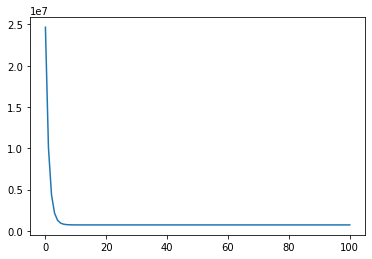

In [8]:
print(final_theta)
plt.plot(err_list)
plt.show()

In [9]:
test=pd.read_csv('Testing/Linear_X_Test.csv')
test=test.values.reshape((-1,))
test

array([-1.87794441, -0.86903192, -2.53018242, ...,  0.12800782,
       -0.27803759, -0.68042543])

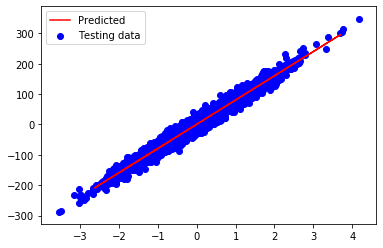

In [10]:
plt.plot(test,hypothesis(test,final_theta),color='red',label='Predicted')
plt.scatter(X,Y,color='blue',label='Testing data')
plt.legend()
plt.show()